# Statistics 

[Scipy](https://www.scipy.org/) is python package built on Numpy for scientific computing. Scipy has multiple sub-packages for optimization, linear algebra, image processing, statistics, etc. This notebook will concentrate on the Scipy’s statistics sub-package to review important statistics concepts we will encounter in data science projects.  

In [1]:
#import scipy 
import scipy as sp

#import numpy for matrix operations
import numpy as np 

#matplotlib library is for drawing diagrams 
import matplotlib.pyplot as plt 
#make sure the display is set as inline so we can see the diagram/chart in notebook
%matplotlib inline 

#we can import normal distribute from a sub-package of scipy
from scipy.stats import norm

In [3]:
#let's generate 10000 random data points 
#using randn() with mean of 0 and standard deviation of 1
number_of_data_points = 10000
random_data_set = sp.randn(number_of_data_points)
type(random_data_set)

numpy.ndarray

In [4]:
random_data_set.mean()  #sample size determine the closeness to 0

0.013672131263054277

In [5]:
sp.median(random_data_set)

0.017865711401124154

In [6]:
min_max = np.array([random_data_set.min(), random_data_set.max()])
min_max

array([-3.58162733,  3.7446898 ])

In [7]:
spread_measures = np.array([sp.std(random_data_set), sp.var(random_data_set)])
spread_measures

array([ 1.0011797,  1.0023608])

In [8]:
#describe() contains most of the properties of the distribution
sp.stats.describe(random_data_set)

DescribeResult(nobs=10000, minmax=(-3.5816273316414526, 3.7446898007736817), mean=0.013672131263054277, variance=1.0024610435820465, skewness=0.001980955518114341, kurtosis=-0.0823203859942283)

In [9]:
iq_mean=100  
iq_std_dev = 15
iq_distribution = norm(loc=iq_mean, scale=iq_std_dev)   #generate dataset from mean and std_dev
for n in np.arange(10):  #take 10 outputs from this distribution
    print('{:6.2f}'.format(iq_distribution.rvs()))  #learn the formated output

 94.79
 96.91
 96.92
132.33
 89.36
 99.71
126.98
 94.40
116.07
 80.28


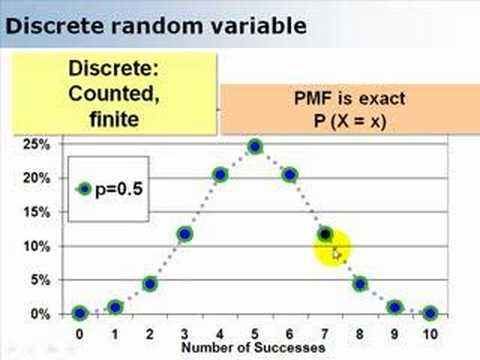

In [26]:
#Now, let's look at discrete and countinous distributions

#This Youtube video is a good introduction to 
#random variable distribution.
from IPython.display import YouTubeVideo
YouTubeVideo("1xQ4r2gcW3c")

[ 0.57863426  0.34726388  0.06946945  0.00463241  0.          0.          0.
  0.        ]
[0 1 2 3 4 5 6 7]


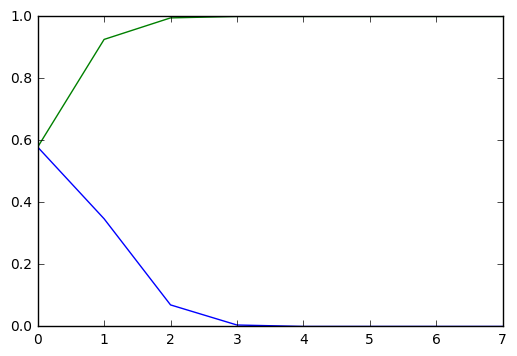

In [132]:
#Binomial is discrete distribution 
#Let's simulate a die roll
x = np.arange(8)
#we can use pmf() to calculate probability mass function
#you will notice that binomial distribution doesn't have pdf()
pmf = sp.stats.binom.pmf(x,3,0.1667)
#cdf() to calculate cumulative distribution function
cdf = sp.stats.binom.cdf(x,3,0.1667)
print(pmf)
print(x)

#Let's draw the diagram
import pylab
pylab.plot(x,pmf)
pylab.plot(x,cdf)

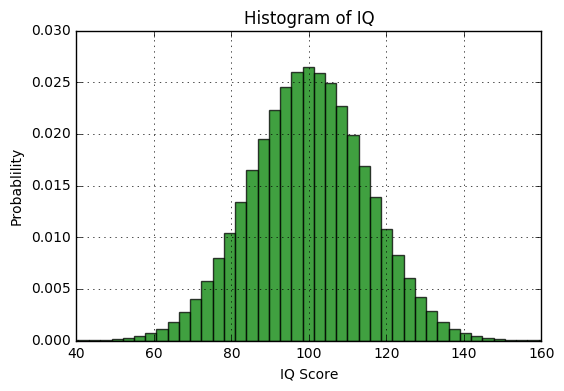

In [10]:
#let's visualize normal distribution 
#Review Normal Distributuion @ 
#https://en.wikipedia.org/wiki/Normal_distribution 

mu, sigma = 100, 15
#method 1 using randn
#data_set = mu+sigma*np.random.randn(10000)

#method 2 using normal(mu, sigma, number_of_samples)
data_set = np.random.normal(mu, sigma, 1000000)

#distribute data into 50 bins to see a histogram
n,bins,pathes = plt.hist(data_set, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('IQ Score')
plt.ylabel('Probablility')
plt.title('Histogram of IQ')
# plt.text(60, 0.25, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()


In [11]:
#use scipy to create and plot normal distribution based on mean and std
from scipy import stats
mean, std =100, 15
X =np.arange(50,150,0.1) #use the range bigger than 3 x std
Y=stats.norm.pdf(X,mean,std)

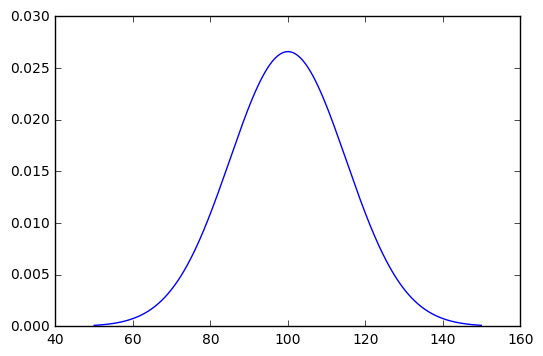

In [12]:
#plot the pdf
plt.plot(X,Y)


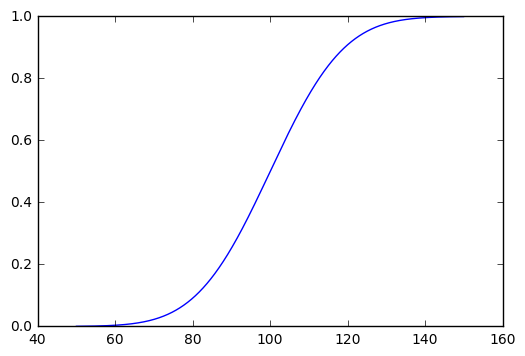

In [13]:
#show CDF
Z=stats.norm.cdf(X,mean,std)
plt.plot(X,Z)

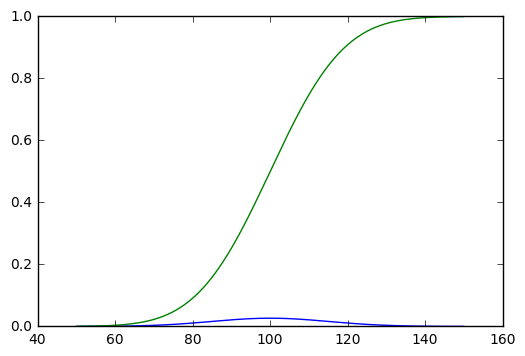

In [14]:
#now, let's put CDF and PDF in the same diagram. 
#do a little research and explain the relationship between CDF and PDF using this diagram
plt.plot(X,Y)
plt.plot(X,Z)

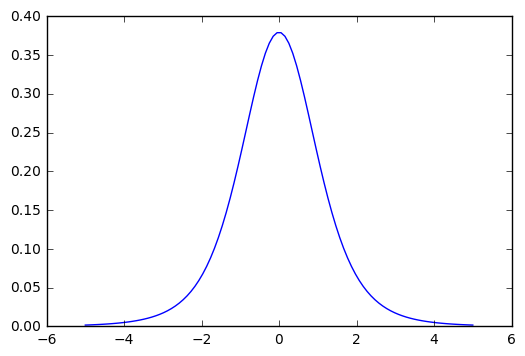

In [16]:
# T-distribution (N<30) student distribution 
from scipy.stats import t

x=np.linspace(-5,5,100)
rv = t(5)
plt.plot(x,rv.pdf(x))

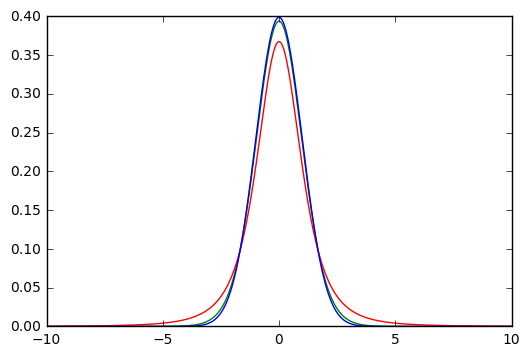

In [20]:
#t(20) is closer to normal distribution, t(30) looks the same

x=np.linspace(-10,10,1000)
rv = t(20)
rv2 = t(3)
plt.plot(x,rv.pdf(x), 'g')
plt.plot(x,rv2.pdf(x), 'r')
y=stats.norm.pdf(x,0,1)
plt.plot(x,y, 'b')

0.0398609968091


<BarContainer object of 100 artists>

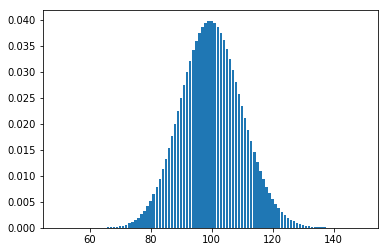

In [13]:
#poisson distribution

#The average IQ is 100. What's the chance of the next tester's IQ is exactly 99
mu = 100
p = sp.stats.poisson.pmf(99,mu)
print(p)

#what does the pmf look like?
x=range(50,150)
p = sp.stats.poisson.pmf(x,mu)
plt.bar(x,p)

<Container object of 100 artists>

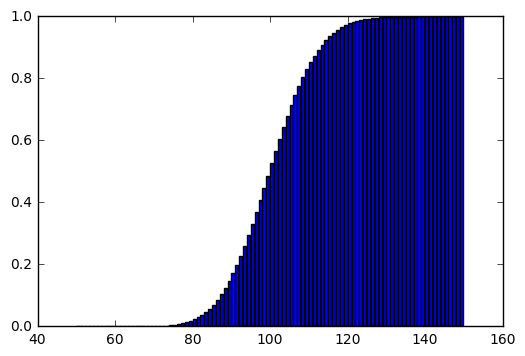

In [91]:
#what does the cmf look like?
x=range(50,150)
p = sp.stats.poisson.cdf(x,mu)
plt.bar(x,p)

In [14]:
#what's the chance that someone's IQ is higher than 120
print(1-sp.stats.poisson.cdf(120,mu))

0.0226693290784


In [35]:
#A/B Test
#Compare the means and variances of the control and treatment groups
#To reject the null hypothesis, we need big t-statistic and low p-value


control_iq_mean=100 
control_iq_std_dev = 15
control_iq = np.random.normal(control_iq_mean, control_iq_std_dev,1000)

treatment_iq_mean=97  
treatment_iq_std_dev = 15
treamtment_iq = np.random.normal(treatment_iq_mean, treatment_iq_std_dev,1000)

sp.stats.ttest_ind(treamtment_iq, control_iq)

#quiz: what does pvalue here mean? 
#repeat the test multiple times, you would receive different p-values
#some show that the two groups have significant difference, some don't
#How about increase the sample size to 1000 or 10000?
#What is the result of sp.stats.ttest_ind(treamtment_iq, control_iq)?

Ttest_indResult(statistic=-0.34524749374122798, pvalue=0.73027480918341925)